In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:\\DScience\\MachineLearningPractical\\SalaryProj\\glassdoor_jobs_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_headquarters_city,same_location,company_age,python_yn,R_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),DATA SCIENCE\nThe ideal candidate willing to b...,1.0,Workoopolis\n1.0,Jaipur,"Mumbai, India",501 to 1000 employees,-1,Company - Private,...,72.0,Workoopolis\n,Mumbai,0,-1,0,0,0,0,0
1,Data Scientist,$63K-$112K (Glassdoor est.),What You Should Expect\n\nTo ride the wave of ...,4.3,Blue Yonder\n4.3,Bengaluru,"Scottsdale, AZ",5001 to 10000 employees,1985,Company - Private,...,87.5,Blue Yonder\n,Scottsdale,0,35,0,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),OVERVIEW OF THE COMPANY\n\nStarStar India has ...,3.8,Star TV Network\n3.8,Mumbai,"Mumbai, India",1001 to 5000 employees,1991,Company - Private,...,85.0,Star TV Network\n,Mumbai,1,29,1,1,0,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),Overview\n\n\nWe have an exciting opportunity ...,4.0,Quanticate\n4.0,Bengaluru,"Hitchin, United Kingdom",201 to 500 employees,1995,Company - Private,...,76.5,Quanticate\n,Hitchin,0,25,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Amazon strives to be Earth's most customer-cen...,4.2,Amazon\n4.2,Hyderabad,"Seattle, WA",10000+ employees,1994,Company - Public,...,114.5,Amazon\n,Seattle,0,26,1,0,1,1,0


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_headquarters_city', 'same_location', 'company_age',
       'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

In [5]:
#Job title and seniority
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal'in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [6]:
#fix location row India
df['Location']=df.Location.apply(lambda x: x.strip() if x.strip().lower() !='india' else 'Unknown')

In [7]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df.job_simp.value_counts()

data scientist    656
na                 41
data engineer      24
analyst            16
manager             5
Name: job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        504
senior    237
jr          1
Name: seniority, dtype: int64

In [9]:
#Job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(str(x)))
df['desc_len']

0      1082
1      1460
2      3665
3      2405
4      2659
       ... 
737    1436
738    2056
739    3706
740    2351
741    2225
Name: desc_len, Length: 742, dtype: int64

In [10]:
#Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(','))if x !=-1 else 0)
df['num_comp']

0      1
1      3
2      1
3      3
4      3
      ..
737    1
738    1
739    1
740    1
741    1
Name: num_comp, Length: 742, dtype: int64

In [11]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n',''))

In [12]:
df['company_txt']

0                                 Workoopolis
1                                 Blue Yonder
2                             Star TV Network
3                                  Quanticate
4                                      Amazon
                        ...                  
737                                Forgeahead
738                          Affine Analytics
739    MAESTRO PLACEMENT CONSULTANCY SERVICES
740                             Noriker Power
741                        o9 Solutions, Inc.
Name: company_txt, Length: 742, dtype: object

In [13]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_location,company_age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.043127,1176.388140,0.032345,0.022911,74.068733,127.183288,100.626011,0.362534,15.191375,0.749326,0.002695,0.365229,0.173854,0.407008,2700.638814,1.506739
std,1.852758,981.939966,0.177034,0.149721,31.869282,46.909006,38.855948,0.481056,30.801283,0.433693,0.051882,0.481819,0.379240,0.491608,1614.114989,0.850074
min,-1.000000,-1.000000,0.000000,0.000000,10.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
25%,3.100000,-1.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,-1.000000,0.250000,0.000000,0.000000,0.000000,0.000000,1629.000000,1.000000
50%,3.600000,1982.000000,0.000000,0.000000,69.500000,124.000000,97.500000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2351.000000,1.000000
75%,4.200000,2009.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,21.000000,1.000000,0.000000,1.000000,0.000000,1.000000,3695.750000,2.000000
max,5.000000,2018.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,177.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10344.000000,3.000000


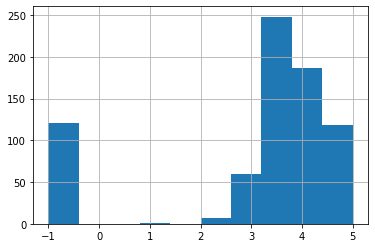

In [14]:
df.Rating.hist()

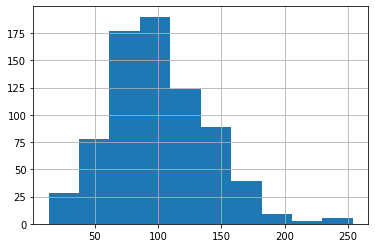

In [15]:
df.avg_salary.hist()

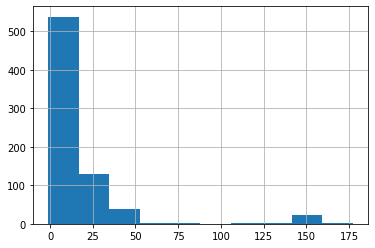

In [16]:
df.company_age.hist()

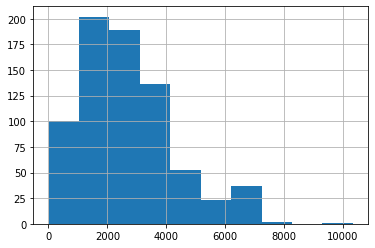

In [17]:
df.desc_len.hist()

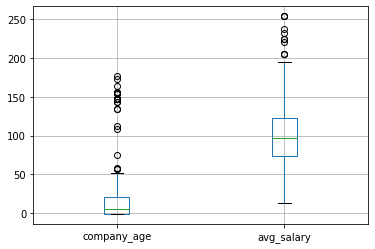

In [18]:
df.boxplot(column = ['company_age','avg_salary'])

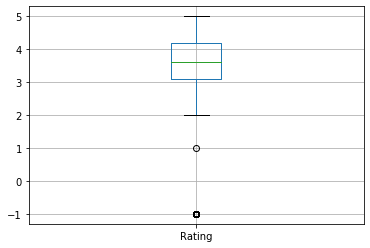

In [19]:
df.boxplot(column= ['Rating'])

In [20]:
df[['company_age','avg_salary','Rating','desc_len']].corr()

,company_age,avg_salary,Rating,desc_len
company_age,1.000000,0.020854,0.224672,0.372653
avg_salary,0.020854,1.000000,0.050281,-0.011611
Rating,0.224672,0.050281,1.000000,0.128877
desc_len,0.372653,-0.011611,0.128877,1.000000


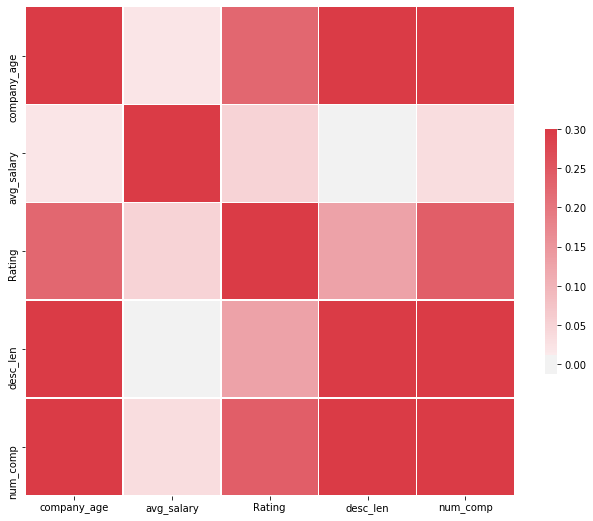

In [21]:
#Corrplot

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df[['company_age','avg_salary','Rating','desc_len','num_comp']].corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [22]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_headquarters_city', 'same_location', 'company_age',
       'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [23]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt','job_headquarters_city',
           'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority']]

Graph for Location: total=26


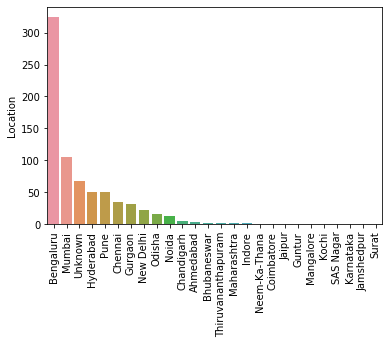

Graph for Headquarters: total=98


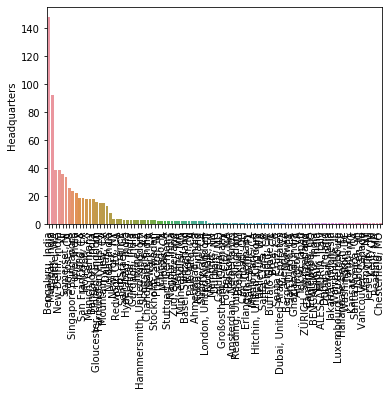

Graph for Size: total=9


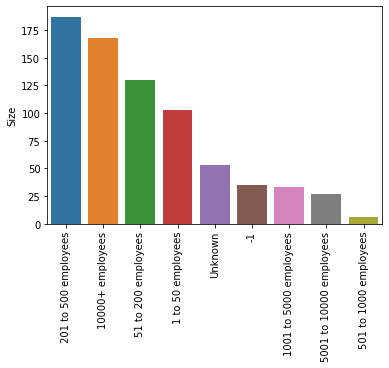

Graph for Founded: total=55


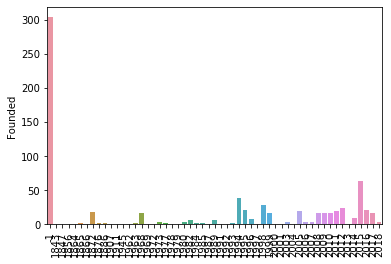

Graph for Type of ownership: total=8


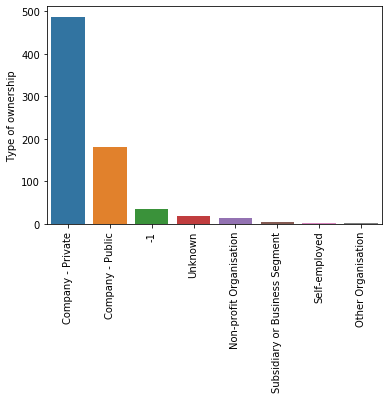

Graph for Industry: total=38


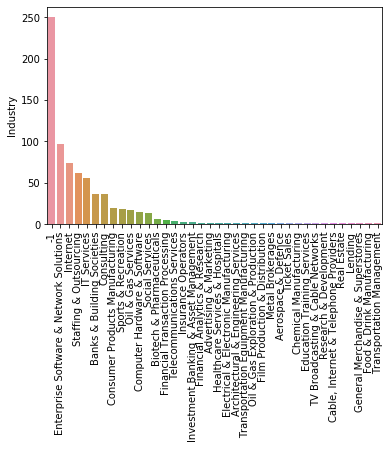

Graph for Sector: total=19


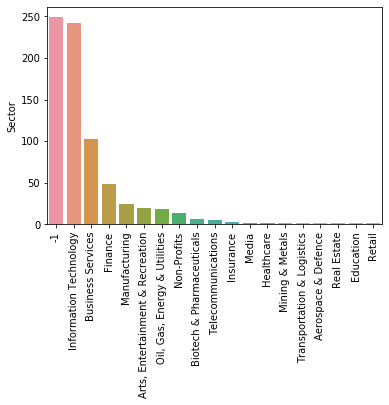

Graph for Revenue: total=12


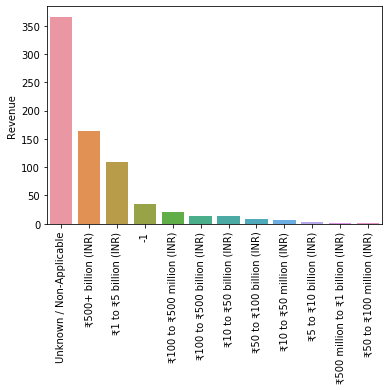

Graph for company_txt: total=223


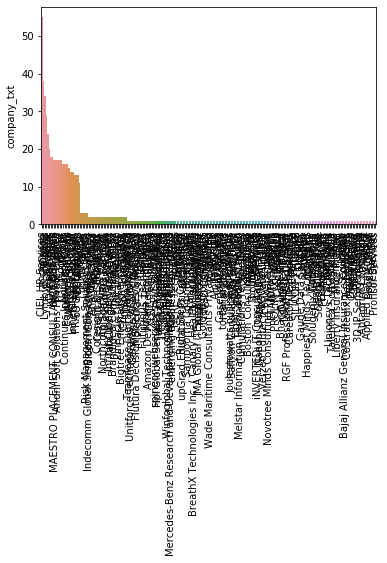

Graph for job_headquarters_city: total=97


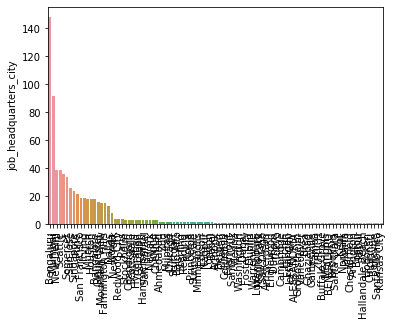

Graph for python_yn: total=2


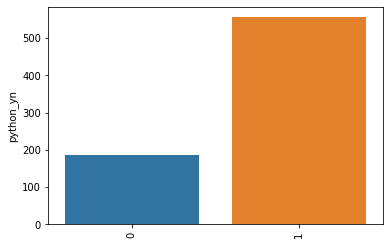

Graph for R_yn: total=2


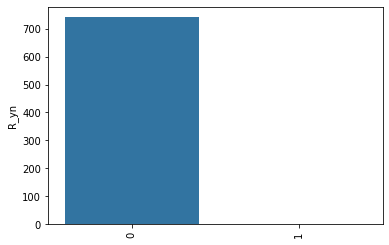

Graph for spark_yn: total=2


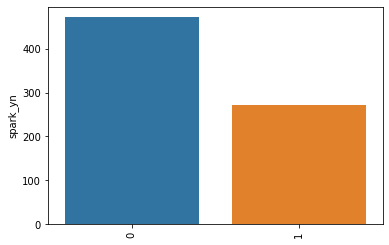

Graph for aws_yn: total=2


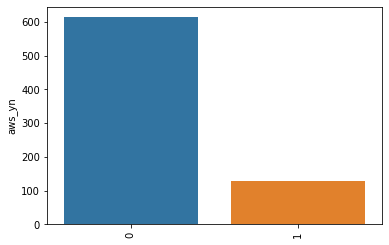

Graph for excel_yn: total=2


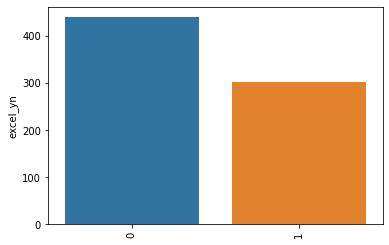

Graph for job_simp: total=5


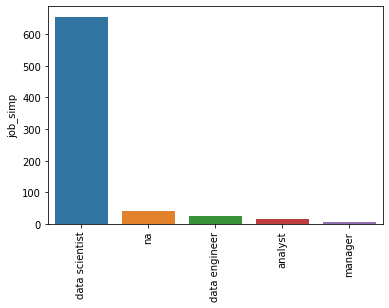

Graph for seniority: total=3


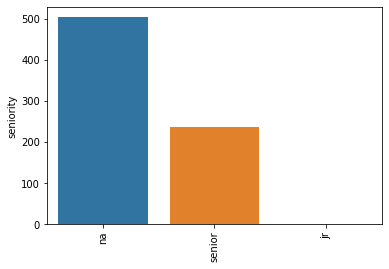

In [24]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s: total=%d" % (i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location: total=20


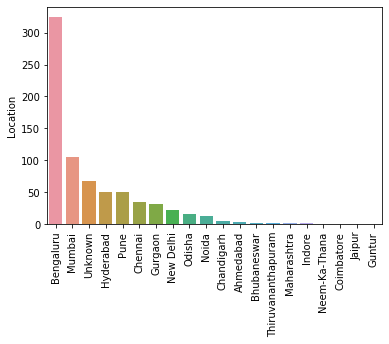

Graph for Headquarters: total=20


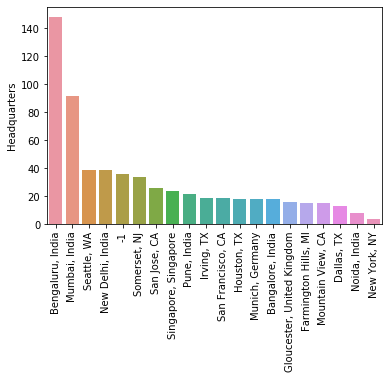

Graph for company_txt: total=20


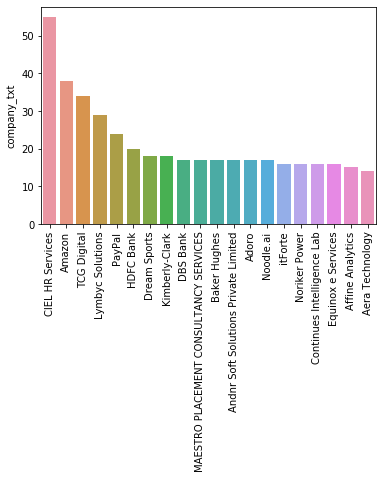

In [25]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("Graph for %s: total=%d" % (i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [26]:
pd.pivot_table(df, index= ['job_simp','seniority'],values='avg_salary')

avg_salary
job_simp       seniority            
analyst        na          94.066667
               senior      85.000000
data engineer  na          94.804348
               senior     102.000000
data scientist jr         181.000000
               na          99.422646
               senior     104.882775
manager        na          84.250000
               senior     140.000000
na             na          96.843750
               senior      96.620000

In [27]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [28]:
pd.pivot_table(df, index=['Location','job_simp'], values='avg_salary',aggfunc='count').sort_values('avg_salary', ascending=False)

,,avg_salary
Location,job_simp,
Bengaluru,data scientist,287
Mumbai,data scientist,102
Unknown,data scientist,67
Pune,data scientist,48
Bengaluru,na,32
Chennai,data scientist,32
Hyderabad,data scientist,29
New Delhi,data scientist,23
Hyderabad,data engineer,19


In [29]:
pd.pivot_table(df[df.job_simp=='data scientist'], index='Location', values='avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
Location,
Kochi,146.500000
Bhubaneswar,120.250000
Karnataka,112.500000
Mangalore,112.000000
Neem-Ka-Thana,110.000000
Unknown,108.402985
Mumbai,107.813725
Noida,107.055556
Odisha,105.468750


In [30]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_headquarters_city', 'same_location', 'company_age',
       'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [31]:
# rating, industry, sector, revenue, number of comp,hourly, employer provided, python, r ,spark, aws, excel, desc_len, type of ownership

In [32]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue','num_comp','hourly', 'employer_provided', 'python_yn', 'R_yn' ,'spark_yn', 'aws_yn', 'excel_yn', 'desc_len', 'Type of ownership','avg_salary']]

In [33]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values='avg_salary').sort_values('avg_salary',ascending=False))

Rating
        avg_salary
Rating            
 2.3    142.500000
 2.5    134.625000
 4.6    130.833333
 4.7    130.250000
 3.0    111.131579
 3.7    108.051724
 2.6    107.500000
 3.6    107.481308
 4.0    105.179245
 4.1    105.000000
 3.9    104.833333
 3.3    104.653846
 4.4    101.900000
 4.5    100.867089
 3.4    100.323529
 3.1     98.937500
 3.5     98.661017
 3.2     96.250000
-1.0     94.512397
 4.2     92.100000
 5.0     91.190476
 3.8     90.269231
 4.3     89.125000
 4.8     88.625000
 2.9     87.833333
 2.8     77.250000
 1.0     72.000000
 2.0     21.500000
Industry
                                         avg_salary
Industry                                           
Food & Drink Manufacturing               237.500000
Lending                                  143.000000
Advertising & Marketing                  141.000000
Healthcare Services & Hospitals          135.250000
Transportation Equipment Manufacturing   125.000000
Financial Transaction Processing         114.80000

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [34]:
pd.pivot_table(df_pivots, index='Revenue', columns='python_yn', values='avg_salary', aggfunc='count')

python_yn,0,1
Revenue,,
-1,3.0,32.0
Unknown / Non-Applicable,118.0,248.0
₹1 to ₹5 billion (INR),NaN,109.0
₹10 to ₹50 billion (INR),4.0,9.0
₹10 to ₹50 million (INR),1.0,6.0
₹100 to ₹500 billion (INR),3.0,11.0
₹100 to ₹500 million (INR),1.0,19.0
₹5 to ₹10 billion (INR),NaN,3.0
₹50 to ₹100 billion (INR),1.0,7.0


In [38]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

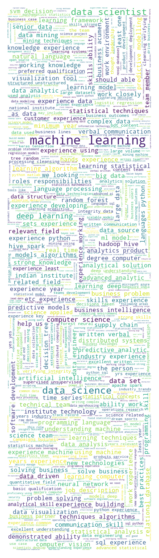

In [45]:
words = " ".join(df['Job Description'].astype(str))

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words=2000, height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()